In [1]:
import wordgraph as wg

In [11]:
from ggplot import *

In [2]:
%reload_ext autoreload
%autoreload 2

# Make an empty WordGraph object

In [48]:
G = wg.WordGraph()

## Load some words

pass path to csv file with words in it, specifying which column to pull the words from

In [59]:
G.load_csv_words('some_words.csv', column='word')

In [60]:
G.words

array(['aardvark', 'abacus', 'abbey', ..., 'zoology', 'zoot-suit',
       'zucchini'], dtype=object)

In [63]:
len(G.words)

4401

## Generate the semantic graph given a similarity function and threshold

In [66]:
# load the vectors and vocab lookup dictionary
G.load_vector_model(vectors_path='vectors_glove_42b_300.npy', vocab_path='dict_glove_42b_300')

G.generate(simil_func='cos', epsilon=0.5)

### get the neighbor distribution for all the words

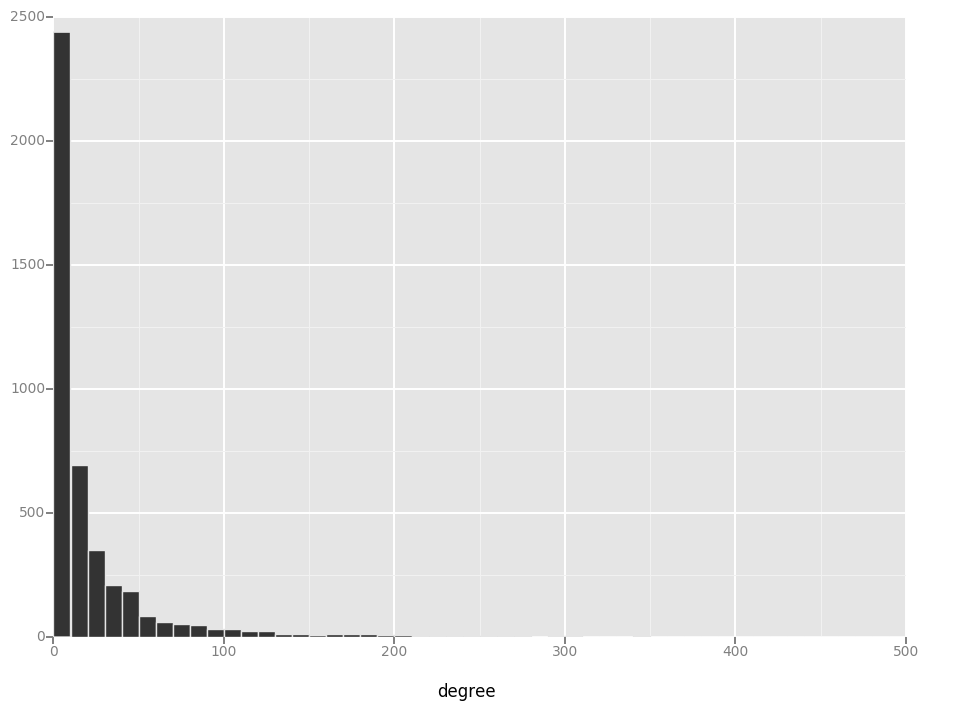

<ggplot: (-9223372036574702087)>

In [68]:
degree_dist = G.degree_ditribution()

ggplot(degree_dist, aes(x='degree')) + geom_histogram(binwidth=10)